In [1]:
1+2


3

In [2]:
import numpy as np
import pandas as pd
import rwi

from sklearn.decomposition import PCA


from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score



In [4]:
import rwi
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

ModuleNotFoundError: No module named 'keras'

In [8]:
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
#import tensorflow as tf
#tf.random.set_seed(seed_value)

In [61]:
sp500 = pd.read_csv('SP500.csv', encoding='utf-8')
sp500['Date'] = pd.to_datetime(sp500['Date'], yearfirst=True)
sp500 = sp500.set_index('Date')
#sp500 = sp500.loc[:'2019-12-31']
sp500['price'] = sp500['Close']
sp500 = sp500.resample('W').last()
sp500 = rwi.generate_features2(sp500)

In [62]:
sp500['atr_5'] = sp500.returns.rolling(5).std()
sp500['atr_20'] = sp500.returns.rolling(20).std()
sp500['atr_50'] = sp500.returns.rolling(50).std()
sp500['range'] = 100*(sp500['High'] - sp500['Low'])/sp500['Low']
sp500['adj_close'] = sp500['Close'] / (sp500['High']*0.5 + sp500['Low']*0.5)
sp500['adj_close'] = sp500['adj_close'].replace([np.inf, -np.inf, 0], 0)

#sp500.drop(columns=['ROC_100', 'ROC_200', 'ROC_500'], inplace=True)

sp500.loc[:,'shift_returns'] = sp500['returns'].shift(-1)

sp500.dropna(inplace=True) # .fillna(0, inplace=True)#

sp500 = sp500[sp500.shift_returns != 0.0]


In [12]:
sp500[sp500.shift_returns > 0]

,Close,Open,High,Low,Volume,Change,price,returns,ROC_2,ROC_3,ROC_5,ROC_20,ROC_50,atr_5,atr_20,atr_50,range,adj_close,shift_returns
Date,,,,,,,,,,,,,,,,,,,
2009-12-20,1102.47,1097.86,1103.74,1093.88,0.0,0.0058,1102.47,-0.003567,-0.003179,0.010009,0.008188,0.110152,0.168190,0.006654,0.020880,0.035614,0.901379,1.003331,0.021545
2010-01-03,1115.10,1126.60,1127.64,1114.81,0.0,-0.0100,1115.10,-0.010154,0.011391,0.007824,0.021400,0.104862,0.271322,0.012869,0.020948,0.034287,1.150869,0.994537,0.026443
2010-02-07,1066.19,1064.12,1067.13,1044.50,0.0,0.0029,1066.19,-0.007177,-0.023700,-0.063448,-0.044853,-0.001977,0.325391,0.023785,0.022574,0.031645,2.166587,1.009827,0.008703
2010-02-14,1075.51,1075.95,1077.81,1062.97,0.0,-0.0027,1075.51,0.008703,0.001526,-0.014996,-0.062592,0.029372,0.380557,0.017736,0.022008,0.030708,1.396088,1.004783,0.030817
2010-02-28,1104.49,1103.10,1107.24,1097.56,0.0,0.0014,1104.49,-0.004228,0.026589,0.035292,0.011593,0.030333,0.378370,0.018309,0.020358,0.025371,0.881956,1.001896,0.030504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02,3225.52,3282.33,3282.33,3214.68,0.0,-0.0177,3225.52,-0.021455,-0.031764,-0.012273,-0.004485,0.070022,0.150227,0.016071,0.010190,0.014912,2.104409,0.992924,0.031190
2020-02-09,3327.71,3335.54,3341.42,3322.12,0.0,-0.0054,3327.71,0.031190,0.009736,-0.000574,0.028302,0.106319,0.175286,0.021489,0.011697,0.015431,0.580954,0.998781,0.015639
2020-03-01,2954.22,2916.90,2959.72,2855.84,0.0,-0.0082,2954.22,-0.122062,-0.134688,-0.119050,-0.109314,-0.005418,0.045619,0.059888,0.031047,0.023140,3.637459,1.015971,0.006125


In [13]:
sp500[sp500.shift_returns < 0]

,Close,Open,High,Low,Volume,Change,price,returns,ROC_2,ROC_3,ROC_5,ROC_20,ROC_50,atr_5,atr_20,atr_50,range,adj_close,shift_returns
Date,,,,,,,,,,,,,,,,,,,
2009-12-27,1126.48,1121.08,1126.48,1121.08,0.0,0.0053,1126.48,0.021545,0.017977,0.018366,0.031655,0.108672,0.235238,0.010613,0.020818,0.034994,0.481678,1.002403,-0.010154
2010-01-10,1144.98,1140.52,1145.39,1136.22,0.0,0.0029,1144.98,0.026443,0.016289,0.037834,0.034655,0.109593,0.319370,0.016118,0.021169,0.034187,0.807062,1.003660,-0.007847
2010-01-17,1136.03,1147.72,1147.77,1131.39,0.0,-0.0108,1136.03,-0.007847,0.018596,0.008442,0.026419,0.099020,0.318846,0.017329,0.021373,0.034191,1.447777,0.996885,-0.039749
2010-01-24,1091.76,1115.49,1115.49,1090.18,0.0,-0.0221,1091.76,-0.039749,-0.047596,-0.021153,-0.009762,0.071524,0.228664,0.026875,0.023332,0.034198,2.321635,0.989958,-0.016522
2010-01-31,1073.87,1087.61,1096.45,1071.59,0.0,-0.0098,1073.87,-0.016522,-0.056271,-0.064118,-0.047829,0.029427,0.261413,0.023766,0.023141,0.033452,2.319917,0.990637,-0.007177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-26,3295.47,3333.10,3333.18,3281.53,0.0,-0.0090,3295.47,-0.010309,0.009182,0.018566,0.022789,0.101058,0.196383,0.011256,0.008394,0.014795,1.573961,0.996406,-0.021455
2020-02-16,3380.16,3378.08,3380.69,3366.15,0.0,0.0018,3380.16,0.015639,0.046829,0.025374,0.034556,0.132129,0.186987,0.021938,0.011316,0.015526,0.431947,1.001998,-0.012626
2020-02-23,3337.75,3360.50,3360.76,3328.45,0.0,-0.0105,3337.75,-0.012626,0.003013,0.034203,0.002439,0.122811,0.196219,0.022035,0.011921,0.015269,0.970722,0.997950,-0.122062


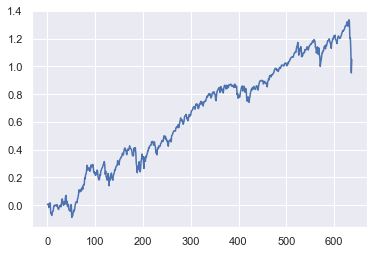

In [14]:
neg = len(sp500[sp500.shift_returns < 0])
pos = len(sp500[sp500.shift_returns > 0])
under_df = sp500[sp500.shift_returns < 0].sample(pos-neg) 
sp500 = pd.concat([under_df, sp500])
sp500.reset_index().returns.cumsum().plot()

In [15]:
sp500.drop(columns=['Close', 'Open', 'High', 'Low', 'Volume', 'price', 'range', 'adj_close', 'Change'], inplace=True)

In [16]:
from sklearn import preprocessing

In [17]:
sp500

,returns,ROC_2,ROC_3,ROC_5,ROC_20,ROC_50,atr_5,atr_20,atr_50,shift_returns
Date,,,,,,,,,,
2019-12-29,0.005819,0.022227,0.029476,0.040864,0.104458,0.221508,0.005489,0.010544,0.014973,-0.001597
2011-06-19,0.000409,-0.022290,-0.045808,-0.050807,-0.003799,0.217868,0.011898,0.015824,0.017891,-0.002402
2011-07-10,0.003078,0.057706,0.055304,0.033014,0.000588,0.197776,0.028709,0.018842,0.017323,-0.020798
2014-01-26,-0.026681,-0.028675,-0.022687,-0.015535,0.078474,0.165030,0.014936,0.012843,0.013649,-0.004310
2018-11-11,0.021058,0.044981,0.004769,-0.036908,0.009440,0.066372,0.032082,0.017391,0.020788,-0.016218
...,...,...,...,...,...,...,...,...,...,...
2020-03-01,-0.122062,-0.134688,-0.119050,-0.109314,-0.005418,0.045619,0.059888,0.031047,0.023140,0.006125
2020-03-08,0.006125,-0.115937,-0.128563,-0.081735,-0.004642,0.059487,0.061191,0.031054,0.023117,-0.092035
2020-03-15,-0.092035,-0.085910,-0.207972,-0.204959,-0.108776,-0.044505,0.062067,0.037032,0.026551,-0.162279


In [18]:

X = sp500.drop(columns='shift_returns')
y = sp500['shift_returns']

X = X.select_dtypes('number')

y = np.sign(y)

#X = np.sign(X)
#y = y.astype('category')
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train=X.iloc[:-60]
y_train = y[:-60]
X_test = X.iloc[-50:]
y_test = y[-50:]


#min_max_scaler = preprocessing.MinMaxScaler() # StandardScaler() #
#X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.10, random_state=42)
#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.fit_transform(X_test)

In [19]:
le.classes_

array([-1.,  1.])

In [379]:
from keras.layers import Dropout
from keras.constraints import maxnorm

In [380]:
X_train.shape

(578, 9)

In [429]:
def build_model():
    model = Sequential()
 #   model.add(Dropout(0.2, input_shape=(19,)))
    
    model.add(Dense(units=9, activation='relu',  input_shape=(9,))) # kernel_constraint=maxnorm(3), # kernel_initializer='random_uniform', bias_initializer='ones', 
    model.add(Dense(units=5, activation='relu'))
    model.add(Dense(units=2, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid')) # kernel_constraint=maxnorm(3),
    
   
 #   model.add(Dropout(0.2, input_shape=(19,)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])


    return model

In [430]:
model = build_model()


In [431]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_104 (Dense)            (None, 5)                 50        
_________________________________________________________________
dense_105 (Dense)            (None, 2)                 12        
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 3         
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [432]:
X_train

,returns,ROC_2,ROC_3,ROC_5,ROC_20,ROC_50,atr_5,atr_20,atr_50
Date,,,,,,,,,
2019-12-29,0.005819,0.022227,0.029476,0.040864,0.104458,0.221508,0.005489,0.010544,0.014973
2011-06-19,0.000409,-0.022290,-0.045808,-0.050807,-0.003799,0.217868,0.011898,0.015824,0.017891
2011-07-10,0.003078,0.057706,0.055304,0.033014,0.000588,0.197776,0.028709,0.018842,0.017323
2014-01-26,-0.026681,-0.028675,-0.022687,-0.015535,0.078474,0.165030,0.014936,0.012843,0.013649
2018-11-11,0.021058,0.044981,0.004769,-0.036908,0.009440,0.066372,0.032082,0.017391,0.020788
...,...,...,...,...,...,...,...,...,...
2019-01-06,0.018415,0.046616,-0.026506,-0.086306,-0.118379,-0.104305,0.042936,0.030040,0.025786
2019-01-13,0.025086,0.043502,0.071702,-0.014082,-0.101873,-0.101240,0.042518,0.030679,0.025848
2019-01-20,0.028272,0.053359,0.071774,0.026852,-0.082890,-0.033658,0.044062,0.031432,0.025625


In [433]:
X_train.shape

(578, 9)

In [434]:
X_test.shape

(50, 9)

In [435]:
50/578

0.08650519031141868

In [436]:
model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=1)

Train on 520 samples, validate on 58 samples
Epoch 1/100
520/520 [==============================] - 1s 3ms/step - loss: 0.6935 - binary_accuracy: 0.5000 - val_loss: 0.6949 - val_binary_accuracy: 0.3966
Epoch 2/100
520/520 [==============================] - 1s 3ms/step - loss: 0.6925 - binary_accuracy: 0.5231 - val_loss: 0.7008 - val_binary_accuracy: 0.3966
Epoch 3/100
520/520 [==============================] - 1s 2ms/step - loss: 0.6927 - binary_accuracy: 0.5154 - val_loss: 0.6994 - val_binary_accuracy: 0.4655
Epoch 4/100
520/520 [==============================] - 1s 3ms/step - loss: 0.6922 - binary_accuracy: 0.5269 - val_loss: 0.7032 - val_binary_accuracy: 0.3966
Epoch 5/100
520/520 [==============================] - 1s 3ms/step - loss: 0.6917 - binary_accuracy: 0.5308 - val_loss: 0.7030 - val_binary_accuracy: 0.4310
Epoch 6/100
520/520 [==============================] - 1s 3ms/step - loss: 0.6917 - binary_accuracy: 0.5327 - val_loss: 0.6996 - val_binary_accuracy: 0.4655
Epoch 7/100
5

In [438]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 60us/step


[0.6880641508102417, 0.5]

In [439]:
y_pred = model.predict_classes(X_test)

In [440]:
y_proba = model.predict(X_test)

In [26]:
from sklearn.metrics import  r2_score, mean_squared_error,  explained_variance_score, accuracy_score, f1_score, roc_auc_score

In [442]:
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

0.5 0.4897959183673469 0.5164203612479474


In [ ]:
### 0.56 0.5925925925925926 0.5641025641025641, long-term roc included

In [ ]:
np.bincount(y_pred.ravel())

In [ ]:
np.bincount(y_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf = RandomForestClassifier(n_estimators = 1000, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
clf.score(X_test, y_test)

0.58

In [23]:
y_pred = clf.predict(X_test)

In [24]:
y_proba = clf.predict_proba(X_test)

In [27]:
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_proba[:,1]))

0.58 0.5531914893617021 0.6929392446633826


In [28]:
from xgboost import plot_importance
import xgboost as xgb

In [29]:
params = {
        'min_child_weight': [1, 2, 3, 5, 7, 10],
        'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 , 0.5, 1, 1.5, 2, 5],
        'subsample': [0.1, 0.3, 0.5, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.1, 0.3, 0.4, 0.5, 0.7, 0.6, 0.8, 1.0],
        'max_depth': [3,  5,  8,  12, 15, 50],
        "learning_rate"    : [0.001, 0.01, 0.1, 0.2, 0.5],
        "eta" : [0.001, 0.01, 0.1, 0.2, 0.3],
        "n_estimators":[1000]
        }

In [31]:
model = xgb.XGBClassifier(n_jobs=5)

In [32]:
import time
n_iter_search = 10000
random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search,  cv=StratifiedKFold( n_splits=5, shuffle=True) ,
                   scoring='roc_auc',
                   verbose=2, refit=True, n_jobs=5)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))


Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   17.9s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:   40.0s
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  4.7min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed:  5.8min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:  7.2min
[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed:  8.6min
[Parallel(n_jobs=5)]: Done 5822 tasks      | elapsed: 10.2min
[Parallel(n_jobs=5)]: Done 6835 tasks      | elapsed: 12.0min
[Parallel(n_jobs=5)]: Done 7928 tasks      | elapsed: 13.8min
[Parallel(n_jobs=5)]: Done 9103 tasks      | elapsed: 15.8min

RandomizedSearchCV took 5758.53 seconds for 10000 candidates parameter settings.


In [33]:
random_search.best_score_ # for auc

0.7622297268595217

In [34]:
random_search.best_estimator_ # for auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.01, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [35]:
import time
n_iter_search = 10000
random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search,  cv=StratifiedKFold( n_splits=5, shuffle=True) ,
                   scoring='accuracy',
                   verbose=2, refit=True, n_jobs=5)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))


Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   17.6s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:   42.1s
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed:  4.0min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  5.5min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed:  7.0min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:  8.3min
[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed:  9.8min
[Parallel(n_jobs=5)]: Done 5822 tasks      | elapsed: 11.3min
[Parallel(n_jobs=5)]: Done 6835 tasks      | elapsed: 13.1min
[Parallel(n_jobs=5)]: Done 7928 tasks      | elapsed: 15.1min
[Parallel(n_jobs=5)]: Done 9103 tasks      | elapsed: 17.1min

RandomizedSearchCV took 5788.77 seconds for 10000 candidates parameter settings.


In [38]:
random_search.best_score_ # for auc

0.7127136431784108

In [39]:
random_search.best_estimator_ # for auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.01, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=12,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)

In [50]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.01, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.01, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [91]:
y_pred = model.predict(X_test)

In [52]:
score = model.score(X_test, y_test)

In [53]:
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

0.56 0.5217391304347826 0.5878489326765188


In [54]:
from sklearn.metrics import roc_auc_score
rf_probs = model.predict_proba(X_test)[:, 1]
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

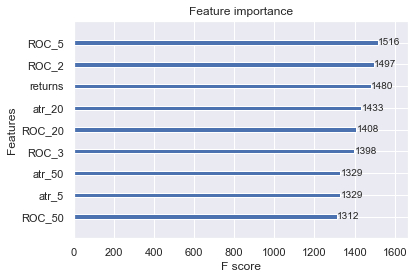

In [55]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [58]:
y_test 

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [59]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [180]:
sp500['hurst'] = sp500[['Close']].rolling(100).apply(rwi.hurstF, raw=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2C2E60888>,
      dtype=object)

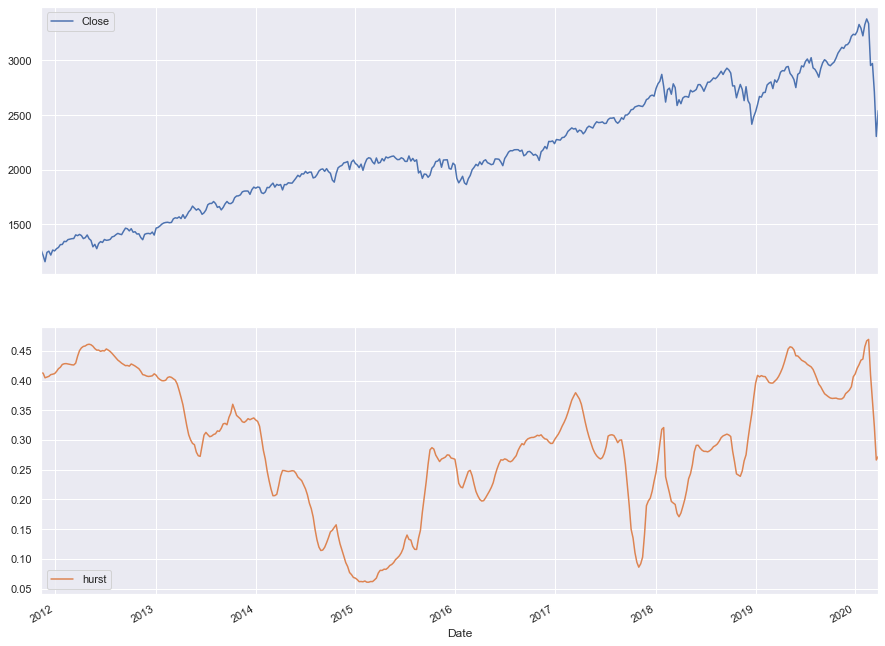

In [182]:
sp500[['Close', 'hurst']].dropna().plot(subplots=(2,1), figsize=(15,12))

In [169]:
df[df.result==1].shape[0]

28

In [170]:
df[df.result==-1].shape[0]

22

In [171]:
28 / (28+22)

0.56

In [184]:
X_train.index.min()

Timestamp('2009-12-20 00:00:00')

In [186]:
X_train.shape

(578, 9)

In [189]:
X_test.index.max()

Timestamp('2020-03-29 00:00:00')

In [177]:
res = []
i = 0
for h in [30, 50, 100, 200, 300, 500]:
    for p in [0.6,0.55,0.5, 0.45, 0.40, 0.35 ,0.30, 0.20]:
        sp500['hurst'] = sp500[['Close']].rolling(h).apply(rwi.hurstF, raw=True)
        df = sp500.iloc[-50:][['Close', 'returns', 'shift_returns' , 'hurst']]

        df['y_pred'] = y_pred
        df['y_test'] = y_test
        df['y_pred'] = df['y_pred'].apply(lambda x:  -1 if x==0 else x)
        df['y_test'] = df['y_test'].apply(lambda x:  -1 if x==0 else x)
        df['result'] = df['y_pred'] *df['y_test']
        df['pnls'] = df['returns'].abs() * df['result']
        
        df = df[df.hurst > p]
        
        pos = df[df.result==1].shape[0]
        neg = df[df.result==-1].shape[0]
        try:
            acc = pos / (pos+neg)
        except:
            continue
        length = len(df[(df.result==1)])
        
        sum_val = df.pnls.sum()
        
        res.append((i, h, p, acc ,length, sum_val))
        i+=1
        
        

In [179]:
pd.DataFrame(res).sort_values(by=[3])

,0,1,2,3,4,5
0,0,30,0.30,0.000000,0,-0.097697
22,22,500,0.20,0.526316,20,-0.275512
20,20,500,0.35,0.529412,18,-0.113696
1,1,30,0.20,0.533333,8,-0.129310
9,9,100,0.40,0.535714,15,0.005467
5,5,50,0.35,0.555556,10,0.096168
21,21,500,0.30,0.555556,20,-0.015536
12,12,100,0.20,0.560000,28,-0.144733
19,19,300,0.20,0.560000,28,-0.144733
16,16,200,0.20,0.560000,28,-0.144733


In [174]:
pd.DataFrame(res)

,0,1,2,3,4,5
0,0,30,0.50,0.560000,28,-0.144733
1,1,30,0.45,0.560000,28,-0.144733
2,2,30,0.40,0.560000,28,-0.144733
3,3,30,0.35,0.560000,28,-0.144733
4,4,30,0.30,0.571429,28,-0.047037
5,5,30,0.20,0.571429,20,-0.015423
6,6,50,0.50,0.500000,21,-0.274807
7,7,50,0.45,0.514286,18,-0.287297
8,8,50,0.40,0.545455,18,-0.251223
9,9,50,0.35,0.562500,18,-0.240901


In [118]:
len(df[(df.result==1) & (df.hurst < p)])

10

In [117]:
p

0.5

In [116]:
df.hurst

Date
2019-04-21    0.462965
2019-04-28    0.487255
2019-05-05    0.510581
2019-05-12    0.519024
2019-05-19    0.519660
2019-05-26    0.516801
2019-06-02    0.503269
2019-06-09    0.504311
2019-06-16    0.503622
2019-06-23    0.500140
2019-06-30    0.496261
2019-07-07    0.493026
2019-07-14    0.487878
2019-07-21    0.481570
2019-07-28    0.469865
2019-08-04    0.447890
2019-08-11    0.413585
2019-08-18    0.372321
2019-08-25    0.337157
2019-09-01    0.295383
2019-09-08    0.242089
2019-09-15    0.191021
2019-09-22    0.145516
2019-09-29    0.125145
2019-10-06    0.109319
2019-10-13    0.117547
2019-10-20    0.122433
2019-10-27    0.135564
2019-11-03    0.149146
2019-11-10    0.157749
2019-11-17    0.212941
2019-11-24    0.248136
2019-12-01    0.252829
2019-12-08    0.194736
2019-12-15    0.152765
2019-12-22    0.142811
2019-12-29    0.156265
2020-01-05    0.175454
2020-01-12    0.194882
2020-01-19    0.224646
2020-01-26    0.246009
2020-02-02    0.237449
2020-02-09    0.259374
2020-0